In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from math import sqrt
from tqdm import tqdm
import plotly.express as px
import matplotlib.pyplot as plt


In [3]:
M_data = pd.read_csv('Flipped_Data.csv')
M_data = M_data.set_index('Date')
M_data

,Addis PRECIP,Addis RELHUM,Addis SUNHRS,Addis TMPMAX,Addis TMPMIN,Addis WINDLY,Arba Minch PRECIP,Arba Minch RELHUM,Arba Minch SUNHRS,Arba Minch TMPMAX,...,Nekemte SUNHRS,Nekemte TMPMAX,Nekemte TMPMIN,Nekemte WINDLY,Robe PRECIP,Robe RELHUM,Robe SUNHRS,Robe TMPMAX,Robe TMPMIN,Robe WINDLY
Date,,,,,,,,,,,,,,,,,,,,,
1987-01-01,0.0,59.000000,2.4,23.6,6.0,2.1,0.0,44.4,8.1,32.4,...,10.1,26.0,10.5,1.2,0.0,55.4,11.0,23.8,5.0,1.9
1987-01-02,0.0,58.000000,8.3,24.5,2.6,1.1,0.0,59.6,7.2,31.5,...,10.5,25.0,9.6,1.5,7.2,70.8,5.8,22.9,4.5,1.9
1987-01-03,0.0,66.500000,5.5,23.5,8.0,1.6,0.0,50.4,8.5,31.4,...,11.0,22.6,8.0,1.2,0.0,64.8,7.5,23.2,6.5,1.7
1987-01-04,0.0,66.166667,5.2,21.3,8.8,1.5,10.5,51.2,8.7,32.5,...,9.7,25.5,8.8,1.2,0.0,60.2,9.3,23.5,7.4,1.6
1987-01-05,0.0,69.000000,2.8,23.3,8.6,1.6,0.0,61.0,9.6,30.5,...,10.0,24.0,10.0,1.5,0.0,64.4,8.2,22.6,8.1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-26,0.0,67.000000,8.2,23.8,12.0,1.7,0.0,58.2,9.5,32.5,...,8.1,24.4,13.0,1.1,4.8,79.2,5.8,22.3,7.0,0.4
2017-09-27,0.0,62.800000,9.1,24.0,11.6,1.7,0.0,60.2,9.5,32.6,...,5.3,23.8,12.9,0.9,6.8,79.0,6.8,21.5,9.5,0.6
2017-09-28,0.0,87.000000,7.3,24.0,11.4,2.3,8.8,66.4,8.5,33.6,...,5.4,23.2,10.6,0.8,8.5,84.2,4.3,20.4,9.5,0.4


In [4]:
drop_Windly_list,drop_Relhum_list,drop_SUNHRS = [],[],[]
for drop in range(len(M_data.columns)):
    if 'WINDLY'  in  M_data.columns[drop]:
        drop_Windly_list.append(M_data.columns[drop])
    if 'RELHUM' in  M_data.columns[drop]:
        drop_Relhum_list.append(M_data.columns[drop])
    if 'SUNHRS' in  M_data.columns[drop]:
        drop_SUNHRS.append(M_data.columns[drop])
M_data = M_data.drop(drop_Windly_list,axis=1)
M_data = M_data.drop(drop_Relhum_list,axis=1)
M_data = M_data.drop(drop_SUNHRS,axis=1)


In [5]:
for i in tqdm(range(len(M_data))):
    for j in range(len(M_data.columns)):
        if pd.isna(M_data.iloc[i,j]):
            prev = i-10
            fpath=M_data.iloc[prev:i,j].mean()
            M_data.iloc[i,j] = fpath

  0%|          | 0/11044 [00:00<?, ?it/s]

100%|██████████| 11044/11044 [00:13<00:00, 834.91it/s]


In [6]:
M_data.describe()

,Addis PRECIP,Addis TMPMAX,Addis TMPMIN,Arba Minch PRECIP,Arba Minch TMPMAX,Arba Minch TMPMIN,Awassa PRECIP,Awassa TMPMAX,Awassa TMPMIN,Combolcha PRECIP,...,Metehara TMPMIN,Neghele PRECIP,Neghele TMPMAX,Neghele TMPMIN,Nekemte PRECIP,Nekemte TMPMAX,Nekemte TMPMIN,Robe PRECIP,Robe TMPMAX,Robe TMPMIN
count,11044.000000,11044.000000,11044.000000,11044.000000,11044.000000,11044.000000,11044.000000,11044.000000,11044.000000,11044.000000,...,11044.000000,11044.000000,11044.000000,11044.000000,11044.000000,11044.000000,11044.000000,11044.000000,11044.000000,11044.000000
mean,2.851974,23.582017,9.984888,2.533258,30.516271,17.434725,2.661708,27.418300,13.053477,2.827092,...,18.032352,1.785150,26.557226,15.872682,5.769794,24.296740,12.902916,2.388129,21.929102,8.250851
std,6.345811,2.220100,2.654368,6.891550,2.583417,2.158732,6.454361,2.487961,2.714390,7.282671,...,3.828952,5.975378,2.815967,1.609735,10.967606,2.798878,1.423083,5.674451,1.826478,2.235795
min,0.000000,13.500000,0.400000,0.000000,18.500000,1.300000,0.000000,16.200000,0.800000,0.000000,...,2.000000,0.000000,12.600000,5.100000,0.000000,10.500000,1.000000,0.000000,8.000000,-0.600000
25%,0.000000,22.000000,8.500000,0.000000,28.800000,16.400000,0.000000,25.700000,11.500000,0.000000,...,16.000000,0.000000,24.600000,15.000000,0.000000,22.200000,12.000000,0.000000,20.800000,6.800000
50%,0.000000,23.500000,10.500000,0.000000,30.500000,17.800000,0.000000,27.500000,13.500000,0.000000,...,19.000000,0.000000,26.500000,16.000000,0.000000,24.300000,12.900000,0.000000,22.000000,8.500000
75%,2.500000,25.000000,12.000000,1.300000,32.200000,18.800000,2.200000,29.200000,15.000000,1.400000,...,20.600000,0.000000,28.600000,17.000000,6.900000,26.300000,13.700000,2.100000,23.200000,10.000000
max,71.200000,31.800000,26.000000,102.400000,38.000000,25.000000,112.000000,34.200000,45.200000,106.000000,...,28.500000,103.600000,34.600000,28.700000,137.500000,32.600000,19.900000,112.300000,29.700000,20.200000


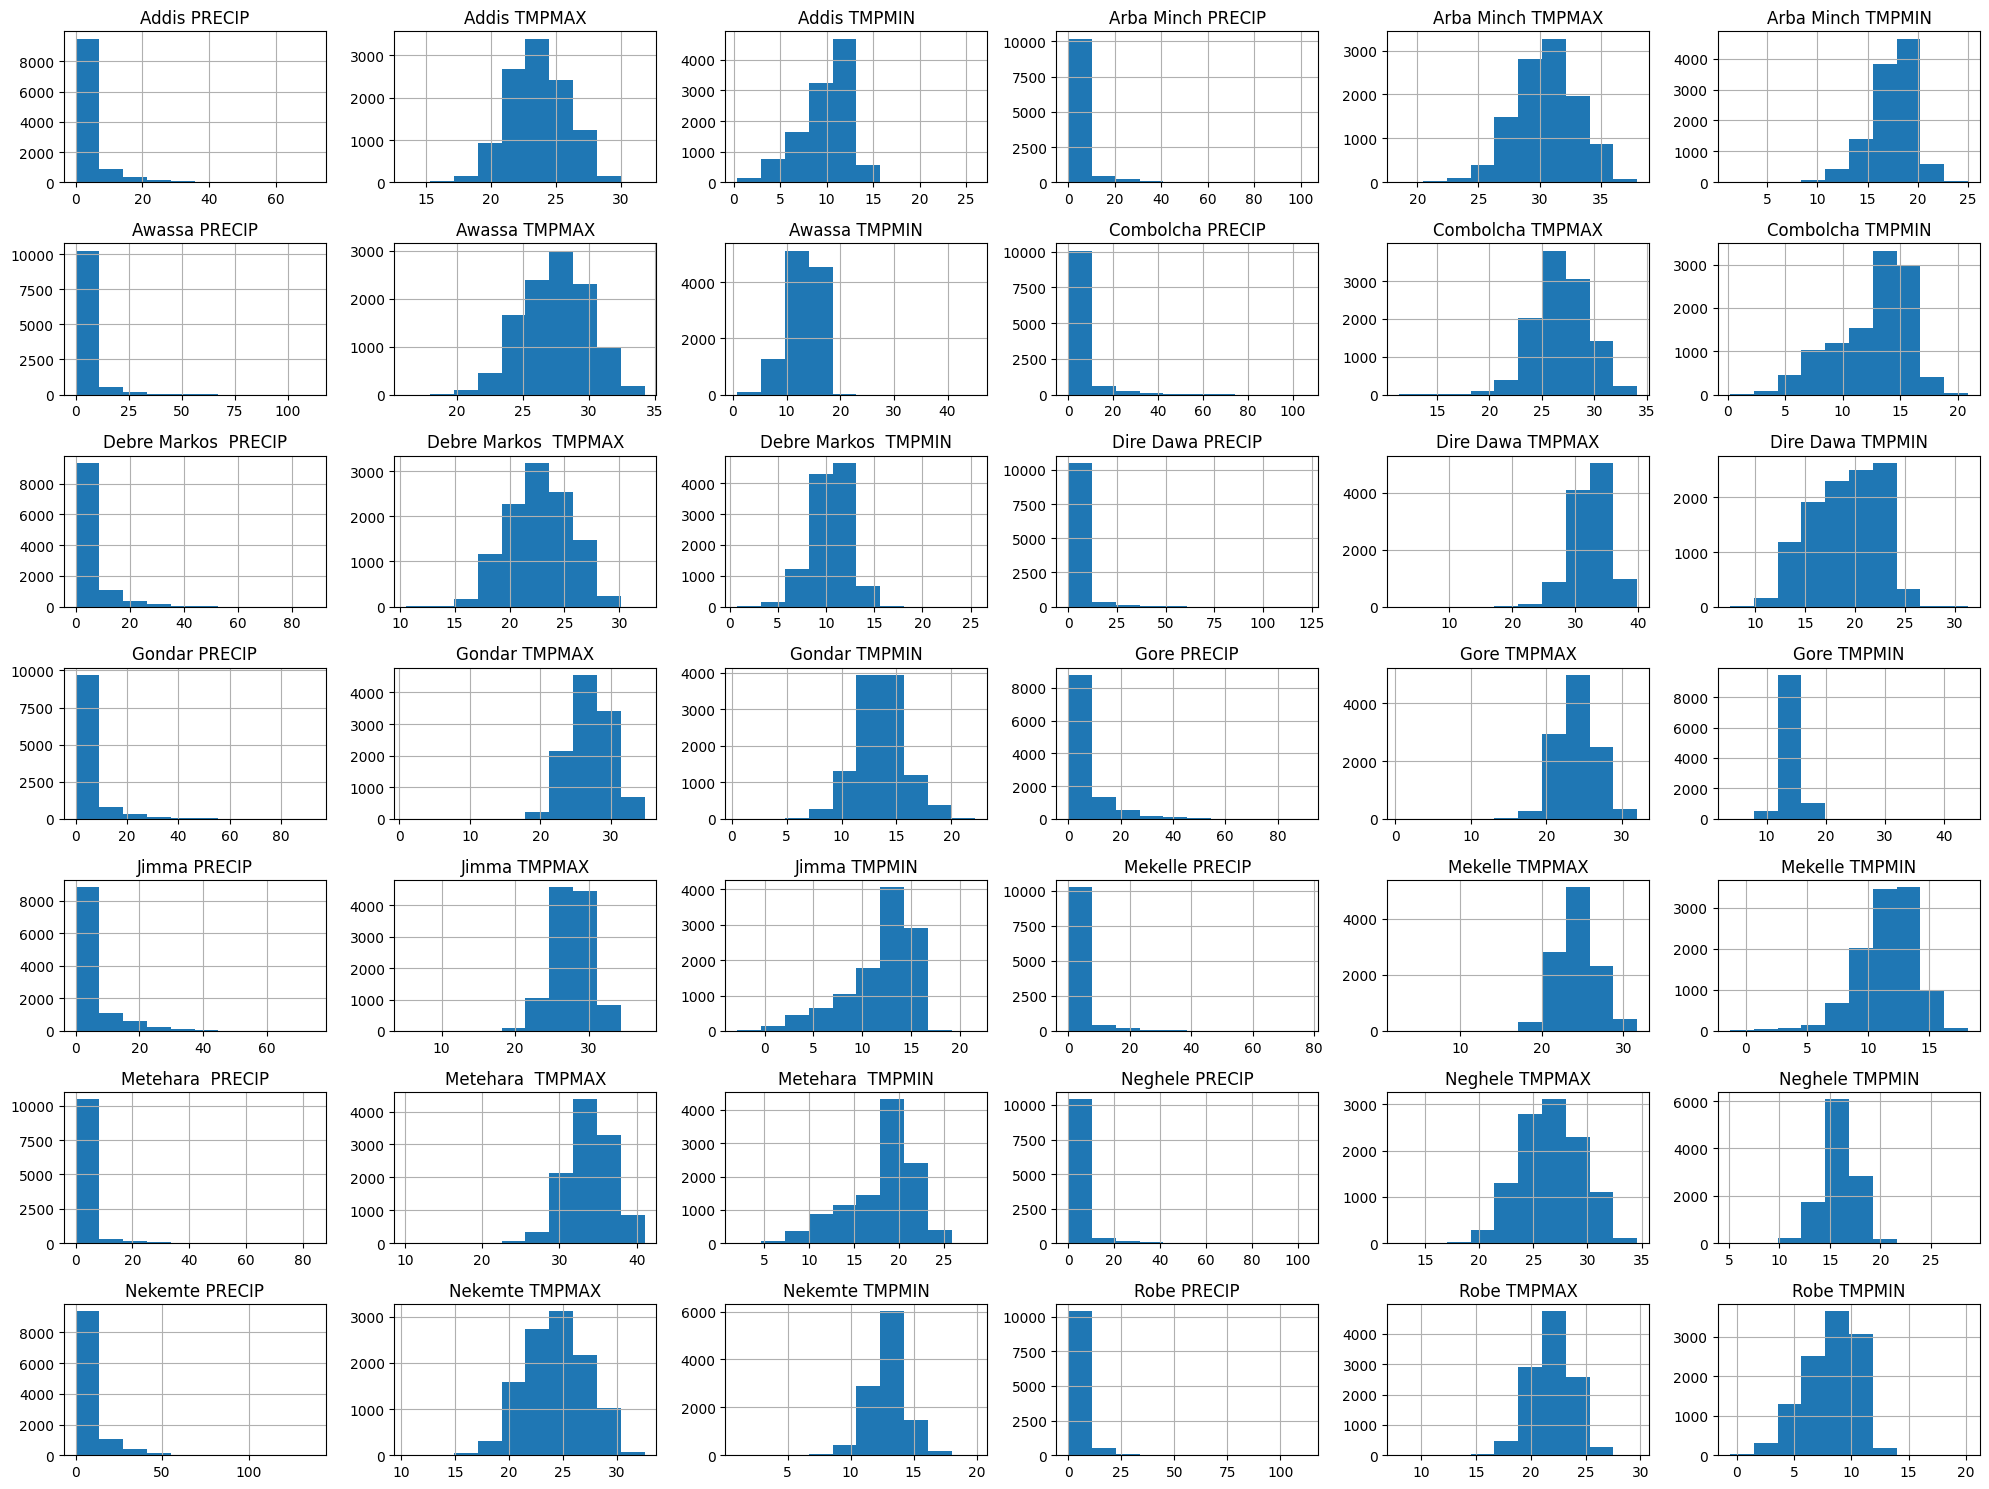

In [7]:
# Histograms and Density Plots
M_data.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

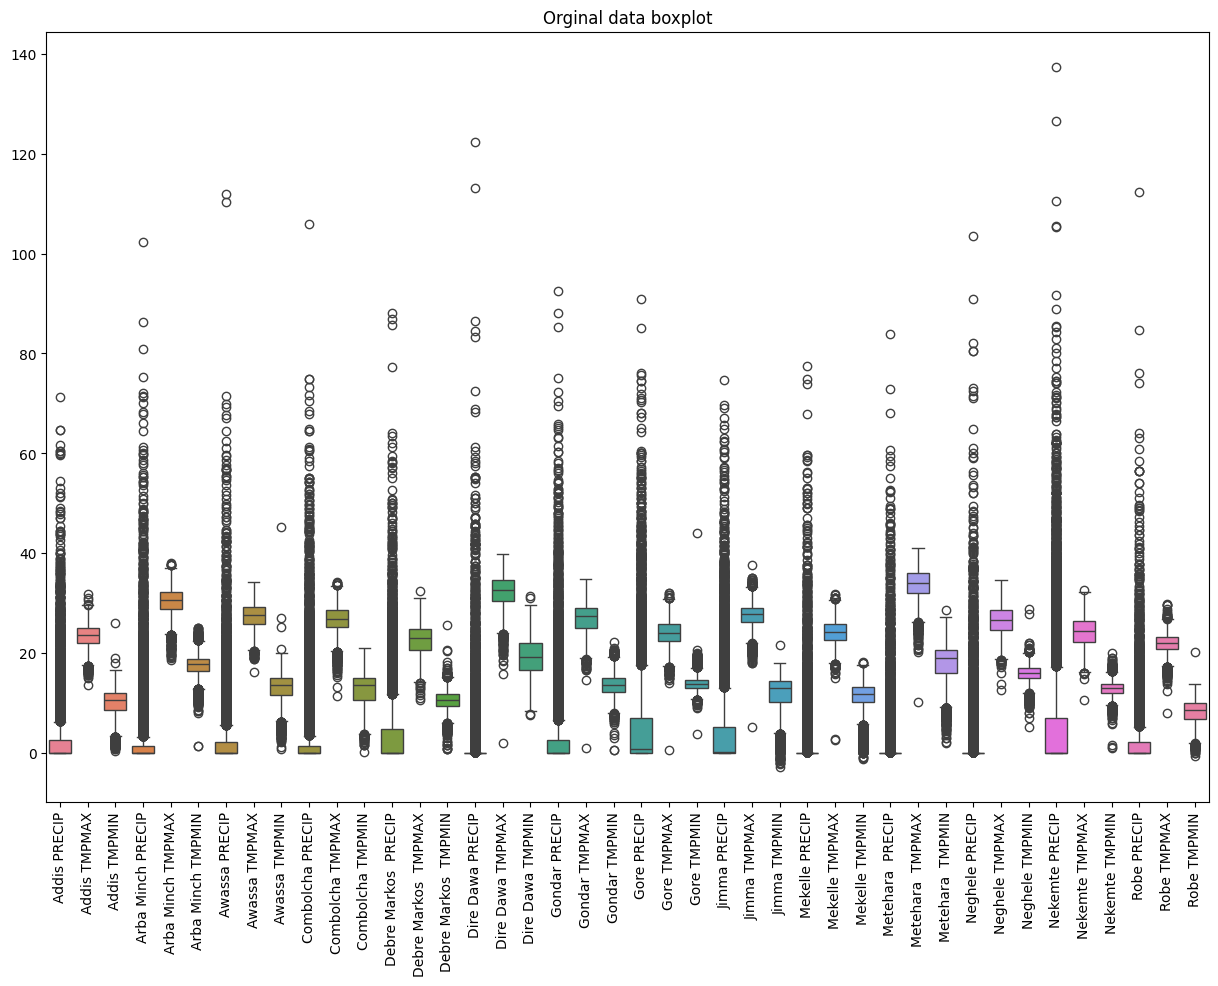

In [8]:
# Box Plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=M_data)
plt.xticks(rotation=90)
plt.title("Orginal data boxplot")
plt.show()

In [9]:
#OUTLIERS DETECTION
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [10]:
outliers = find_outliers_IQR(M_data.iloc[:,[1]])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers: 11044
max outlier value: Addis TMPMAX    31.8
dtype: float64
min outlier value: Addis TMPMAX    13.5
dtype: float64


In [11]:
#OUTLIERS BOUND LIMIT WITH CAP
def Boundary_limit(Data):
    upper_limit = Data.mean() + 3*Data.std()
    lower_limit = Data.mean() - 3*Data.std()

    return upper_limit, lower_limit


def Boundary_CAP(i):
    upper_limit,lower_limit = Boundary_limit(M_data.iloc[:,[i]])
    M_data.iloc[:,[i]] = np.where(M_data.iloc[:,[i]] > upper_limit,
        M_data.iloc[:,[i]].mean(),
        np.where(
            M_data.iloc[:,[i]] < lower_limit,
            M_data.iloc[:,[i]].mean(),
            M_data.iloc[:,[i]]

        )

    )
#BOUNDARY LIMIT WITH MEAN
def Boundary_for_mean(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    upper = df[~(df>(q3+1.5*IQR))].max()
    lower = df[~(df<(q1-1.5*IQR))].min()

    return upper,lower
def Boundary_Mean(i):
    upper_limit,lower_limit = Boundary_for_mean(M_data.iloc[:,[i]])
    M_data.iloc[:,[i]] = np.where(M_data.iloc[:,[i]] > upper_limit,
        M_data.iloc[:,[i]].mean(),
        np.where(
            M_data.iloc[:,[i]] < lower_limit,
            M_data.iloc[:,[i]].mean(),
            M_data.iloc[:,[i]]

        )

    )

In [12]:
for i in tqdm(range(len(M_data.columns))):
    #Boundary_CAP(i)
    Boundary_Mean(i)
  


100%|██████████| 42/42 [00:00<00:00, 115.88it/s]


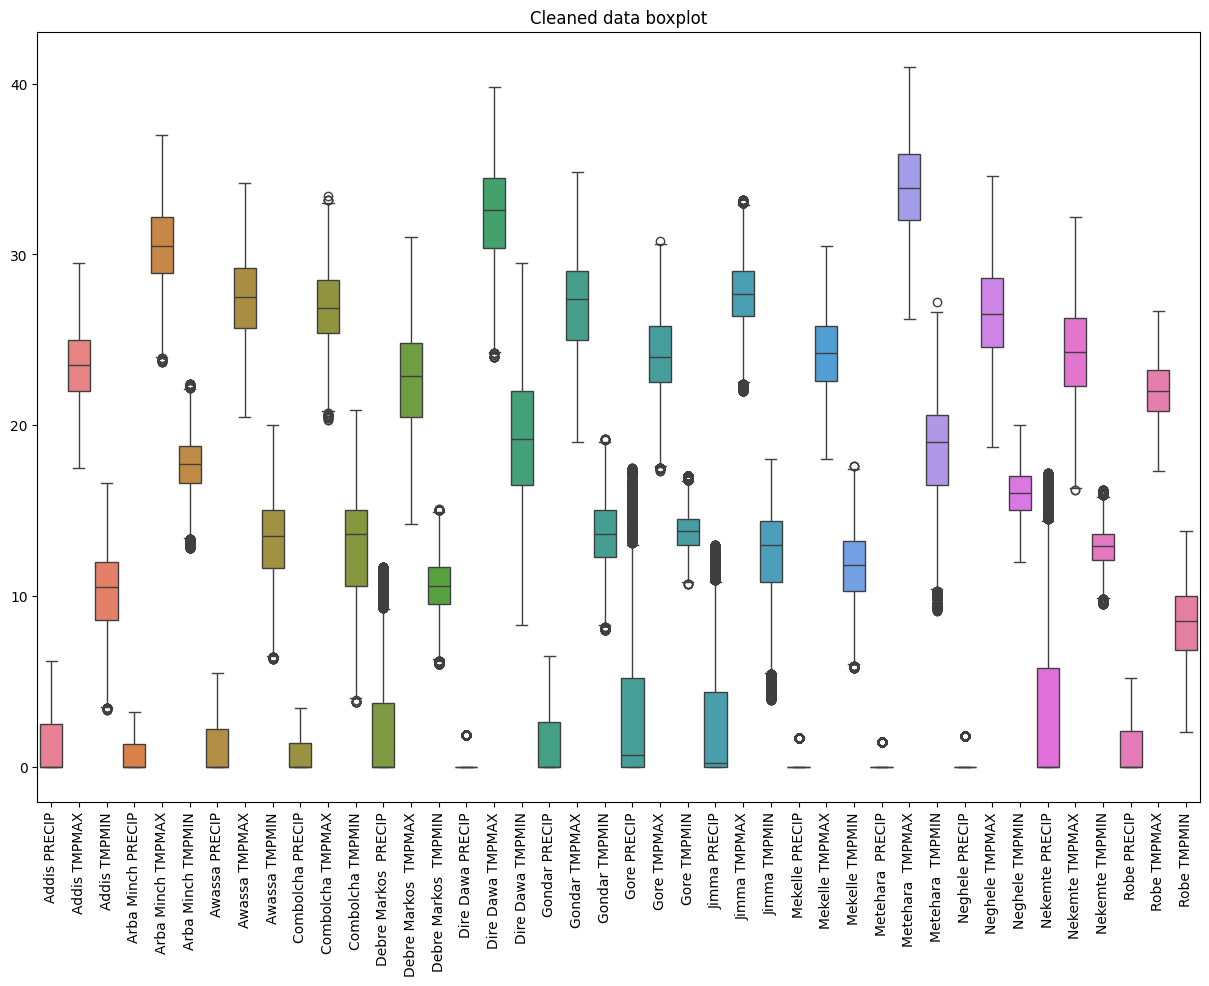

In [13]:
# Box Plots
plt.figure(figsize=(15, 10))
sns.boxplot(data= M_data)
plt.xticks(rotation=90)
plt.title("Cleaned data boxplot")
plt.show()

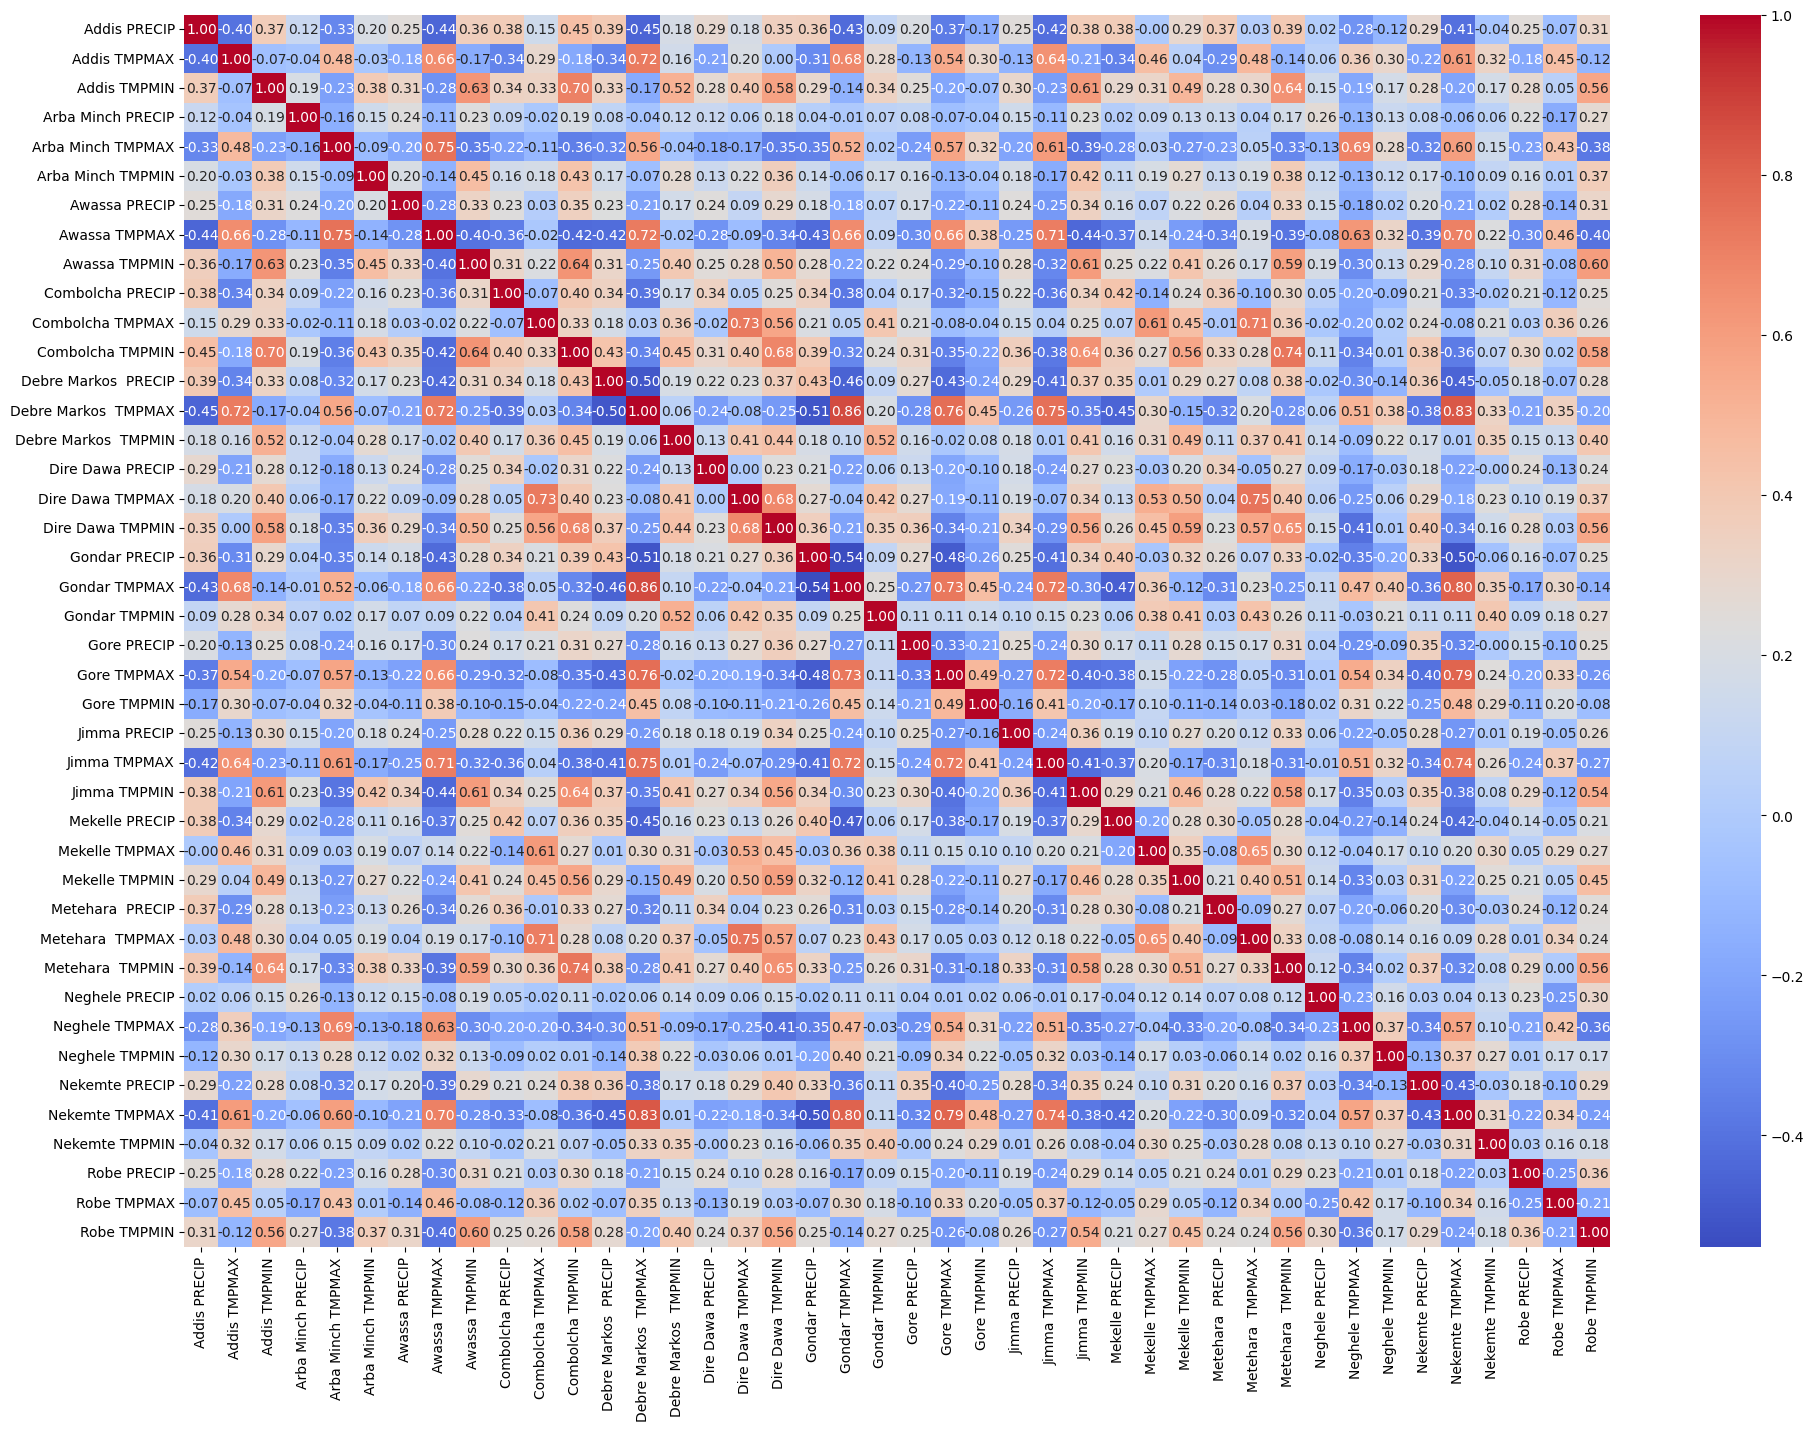

In [14]:
# Specified strings
specified_strings = ['PRECIP','TMPMAX','TMPMIN']
# Filter columns based on the specified strings
filtered_columns = [col for col in M_data.columns if any(s in col for s in specified_strings)]
filtered_df = M_data[filtered_columns]
plt.figure(figsize=(23, 16))
sns.heatmap(filtered_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [15]:
M_data.to_csv('Weather_Data.csv')